In [3]:
from evaluatedetection import getfeatures, getlabels, displayframe
import shapefeatures
import matplotlib.pyplot as plt
import os
from lxml import etree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc
from sklearn import ensemble, linear_model, metrics
import numpy as np
import glob
import pickle
import cv2
import sys

DATA_DIR = 'data/'
IMAGE_DIR = DATA_DIR + 'images/'
FEATURES_DIR = DATA_DIR + 'features/'
ANNOTATION_DIR = DATA_DIR + 'annotation/'
RESULTS_DIR = DATA_DIR + 'results/'

#FILENAME='_cf2'

# Extremely Randomized Trees Classifier

## Feature: Connnected component features + Moment features

In [2]:
featureset = [3,7,11,12,15,17]
num_files = 2700
threshold = 0.5
train_set_proportion = .75
test_set_proportion = 1 - train_set_proportion
filters = [[11,'>',1000]]
centiles = [0,25,50,75,100]
size = 40
step = 30
reusefeatures = False
savefeatures = True
reuseclassifier = False
saveclassifier = True
saveresults = True

# Split up image files into training and test sets
imgfilenames = glob.glob(IMAGE_DIR + '*.jpg')

baseimgfilenames = [os.path.basename(imgfilenames[i]) 
                    for i in range(num_files)]                            

train, test = train_test_split(np.arange(num_files),
                               train_size=train_set_proportion,
                               test_size=test_set_proportion,
                               random_state=1)  

trainfiles = [baseimgfilenames[i] for i in train]
testfiles = [baseimgfilenames[i] for i in test]  

print 'Extracting features from training images...'
Xtrain = getfeatures(trainfiles, size, step,
                    attributes=featureset,
                    filters=filters,
                    centiles=centiles,
                    loadfromfile=reusefeatures, 
                    savetofile=savefeatures,
                    filename='Xtrain.npy') 

ytrain = getlabels(trainfiles, size, step,
                  loadfromfile=reusefeatures,
                  savetofile=savefeatures,
                  filename='ytrain.npy')     
                            
print 'Extracting features from testing images...'
Xtest = getfeatures(testfiles, size, step,
                    attributes=featureset,
                    filters=filters,
                    centiles=centiles,
                    loadfromfile=reusefeatures, 
                    savetofile=savefeatures,
                    filename='Xtest.npy') 

ytest = getlabels(testfiles, size, step,
                  loadfromfile=reusefeatures,
                  savetofile=savefeatures,
                  filename='ytest.npy')   

# Classification - Extremely Randomized Trees classifier
if reuseclassifier:
    classifier = pickle.load(open(FEATURES_DIR + 'classifier.pkl', 'rb')) 

else:
    print 'Training...'
    classifier = ensemble.ExtraTreesClassifier(n_estimators=250, max_depth=5, n_jobs=-1)
    classifier.fit(Xtrain,ytrain)

if saveclassifier:
    pickle.dump(classifier, open(FEATURES_DIR + 'classifier.pkl', 'wb'))


# Plot bounding boxes around parasites annotated on testing images
predictions = classifier.predict_proba(Xtest)[:,1]
#for i, img_name in enumerate(testfiles):
#    img = (cv2.imread("data/images/{}".format(img_name)))
#    output = displayframe(img=img, predictions=predictions[i*850:(i+1)*850], labels=ytest[i*850:(i+1)*850], threshold=threshold, size=size, step=step)
#    cv2.imwrite(img_name, output)

    
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(ytest, predictions)
    
area = auc(recall, precision)
print("Area under precision-recall curve: %0.2f" % area)
    
fig = plt.figure()
fig.set_size_inches(4,4)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AUC=%0.2f' % area)
plt.savefig("precision_recall.pdf")


Extracting features from training images...
plasmodium-1310.jpg (1/2025)
plasmodium-2633.jpg (2/2025)
plasmodium-0440.jpg (3/2025)
plasmodium-1265.jpg (4/2025)
plasmodium-0206.jpg (5/2025)
plasmodium-1417.jpg (6/2025)
plasmodium-0030.jpg (7/2025)
plasmodium-0258.jpg (8/2025)
plasmodium-0134.jpg (9/2025)
plasmodium-2388.jpg (10/2025)
plasmodium-2026.jpg (11/2025)
plasmodium-2156.jpg (12/2025)
plasmodium-1415.jpg (13/2025)
plasmodium-0173.jpg (14/2025)
plasmodium-0749.jpg (15/2025)
plasmodium-2353.jpg (16/2025)
plasmodium-0169.jpg (17/2025)
plasmodium-0836.jpg (18/2025)
plasmodium-2043.jpg (19/2025)
plasmodium-0761.jpg (20/2025)
plasmodium-1299.jpg (21/2025)
plasmodium-0443.jpg (22/2025)
plasmodium-2512.jpg (23/2025)
plasmodium-1956.jpg (24/2025)
plasmodium-2317.jpg (25/2025)
plasmodium-2199.jpg (26/2025)
plasmodium-1179.jpg (27/2025)
plasmodium-0123.jpg (28/2025)
plasmodium-2682.jpg (29/2025)
plasmodium-2134.jpg (30/2025)
plasmodium-1967.jpg (31/2025)
plasmodium-1545.jpg (32/2025)
plasm

plasmodium-1454.jpg (268/2025)
plasmodium-0630.jpg (269/2025)
plasmodium-2215.jpg (270/2025)
plasmodium-2369.jpg (271/2025)
plasmodium-2659.jpg (272/2025)
plasmodium-0293.jpg (273/2025)
plasmodium-2438.jpg (274/2025)
plasmodium-0894.jpg (275/2025)
plasmodium-1661.jpg (276/2025)
plasmodium-0301.jpg (277/2025)
plasmodium-1743.jpg (278/2025)
plasmodium-2246.jpg (279/2025)
plasmodium-1453.jpg (280/2025)
plasmodium-0631.jpg (281/2025)
plasmodium-0943.jpg (282/2025)
plasmodium-1241.jpg (283/2025)
plasmodium-0212.jpg (284/2025)
plasmodium-2129.jpg (285/2025)
plasmodium-0585.jpg (286/2025)
plasmodium-1893.jpg (287/2025)
plasmodium-1595.jpg (288/2025)
plasmodium-0925.jpg (289/2025)
plasmodium-2183.jpg (290/2025)
plasmodium-0338.jpg (291/2025)
plasmodium-1442.jpg (292/2025)
plasmodium-1073.jpg (293/2025)
plasmodium-0985.jpg (294/2025)
plasmodium-1953.jpg (295/2025)
plasmodium-1550.jpg (296/2025)
plasmodium-2449.jpg (297/2025)
plasmodium-1505.jpg (298/2025)
plasmodium-2023.jpg (299/2025)
plasmodi

plasmodium-0000.jpg (533/2025)
plasmodium-2286.jpg (534/2025)
plasmodium-1817.jpg (535/2025)
plasmodium-0176.jpg (536/2025)
plasmodium-2166.jpg (537/2025)
plasmodium-1696.jpg (538/2025)
plasmodium-0512.jpg (539/2025)
plasmodium-0536.jpg (540/2025)
plasmodium-0919.jpg (541/2025)
plasmodium-0361.jpg (542/2025)
plasmodium-1139.jpg (543/2025)
plasmodium-1850.jpg (544/2025)
plasmodium-1413.jpg (545/2025)
plasmodium-0336.jpg (546/2025)
plasmodium-0766.jpg (547/2025)
plasmodium-0434.jpg (548/2025)
plasmodium-1054.jpg (549/2025)
plasmodium-2030.jpg (550/2025)
plasmodium-1671.jpg (551/2025)
plasmodium-2020.jpg (552/2025)
plasmodium-0407.jpg (553/2025)
plasmodium-1403.jpg (554/2025)
plasmodium-2472.jpg (555/2025)
plasmodium-2610.jpg (556/2025)
plasmodium-2196.jpg (557/2025)
plasmodium-1785.jpg (558/2025)
plasmodium-1813.jpg (559/2025)
plasmodium-2380.jpg (560/2025)
plasmodium-2613.jpg (561/2025)
plasmodium-0578.jpg (562/2025)
plasmodium-0478.jpg (563/2025)
plasmodium-1270.jpg (564/2025)
plasmodi

plasmodium-0969.jpg (798/2025)
plasmodium-0698.jpg (799/2025)
plasmodium-0976.jpg (800/2025)
plasmodium-1103.jpg (801/2025)
plasmodium-1338.jpg (802/2025)
plasmodium-0950.jpg (803/2025)
plasmodium-1902.jpg (804/2025)
plasmodium-1428.jpg (805/2025)
plasmodium-0426.jpg (806/2025)
plasmodium-2619.jpg (807/2025)
plasmodium-0175.jpg (808/2025)
plasmodium-0079.jpg (809/2025)
plasmodium-0593.jpg (810/2025)
plasmodium-1347.jpg (811/2025)
plasmodium-1958.jpg (812/2025)
plasmodium-2162.jpg (813/2025)
plasmodium-0491.jpg (814/2025)
plasmodium-0988.jpg (815/2025)
plasmodium-1446.jpg (816/2025)
plasmodium-2245.jpg (817/2025)
plasmodium-1864.jpg (818/2025)
plasmodium-0824.jpg (819/2025)
plasmodium-0494.jpg (820/2025)
plasmodium-0799.jpg (821/2025)
plasmodium-1001.jpg (822/2025)
plasmodium-0847.jpg (823/2025)
plasmodium-1674.jpg (824/2025)
plasmodium-1703.jpg (825/2025)
plasmodium-1467.jpg (826/2025)
plasmodium-2605.jpg (827/2025)
plasmodium-0887.jpg (828/2025)
plasmodium-2547.jpg (829/2025)
plasmodi

plasmodium-2356.jpg (1061/2025)
plasmodium-2670.jpg (1062/2025)
plasmodium-2067.jpg (1063/2025)
plasmodium-2000.jpg (1064/2025)
plasmodium-2269.jpg (1065/2025)
plasmodium-2149.jpg (1066/2025)
plasmodium-1224.jpg (1067/2025)
plasmodium-0349.jpg (1068/2025)
plasmodium-2145.jpg (1069/2025)
plasmodium-1056.jpg (1070/2025)
plasmodium-0635.jpg (1071/2025)
plasmodium-1346.jpg (1072/2025)
plasmodium-0029.jpg (1073/2025)
plasmodium-0318.jpg (1074/2025)
plasmodium-1915.jpg (1075/2025)
plasmodium-0543.jpg (1076/2025)
plasmodium-1605.jpg (1077/2025)
plasmodium-0355.jpg (1078/2025)
plasmodium-2491.jpg (1079/2025)
plasmodium-2566.jpg (1080/2025)
plasmodium-0493.jpg (1081/2025)
plasmodium-2606.jpg (1082/2025)
plasmodium-2192.jpg (1083/2025)
plasmodium-0723.jpg (1084/2025)
plasmodium-0180.jpg (1085/2025)
plasmodium-2344.jpg (1086/2025)
plasmodium-0244.jpg (1087/2025)
plasmodium-0166.jpg (1088/2025)
plasmodium-1298.jpg (1089/2025)
plasmodium-2451.jpg (1090/2025)
plasmodium-1600.jpg (1091/2025)
plasmodi

plasmodium-1786.jpg (1319/2025)
plasmodium-2168.jpg (1320/2025)
plasmodium-2054.jpg (1321/2025)
plasmodium-2649.jpg (1322/2025)
plasmodium-1078.jpg (1323/2025)
plasmodium-1092.jpg (1324/2025)
plasmodium-1257.jpg (1325/2025)
plasmodium-1998.jpg (1326/2025)
plasmodium-0084.jpg (1327/2025)
plasmodium-1665.jpg (1328/2025)
plasmodium-2165.jpg (1329/2025)
plasmodium-2330.jpg (1330/2025)
plasmodium-2549.jpg (1331/2025)
plasmodium-2437.jpg (1332/2025)
plasmodium-2669.jpg (1333/2025)
plasmodium-1211.jpg (1334/2025)
plasmodium-0755.jpg (1335/2025)
plasmodium-2241.jpg (1336/2025)
plasmodium-0151.jpg (1337/2025)
plasmodium-1855.jpg (1338/2025)
plasmodium-0511.jpg (1339/2025)
plasmodium-2088.jpg (1340/2025)
plasmodium-0388.jpg (1341/2025)
plasmodium-1161.jpg (1342/2025)
plasmodium-0731.jpg (1343/2025)
plasmodium-0172.jpg (1344/2025)
plasmodium-2363.jpg (1345/2025)
plasmodium-0530.jpg (1346/2025)
plasmodium-2147.jpg (1347/2025)
plasmodium-0765.jpg (1348/2025)
plasmodium-1479.jpg (1349/2025)
plasmodi

plasmodium-2433.jpg (1576/2025)
plasmodium-0071.jpg (1577/2025)
plasmodium-2321.jpg (1578/2025)
plasmodium-1898.jpg (1579/2025)
plasmodium-2303.jpg (1580/2025)
plasmodium-2289.jpg (1581/2025)
plasmodium-1207.jpg (1582/2025)
plasmodium-2077.jpg (1583/2025)
plasmodium-2581.jpg (1584/2025)
plasmodium-1063.jpg (1585/2025)
plasmodium-1528.jpg (1586/2025)
plasmodium-2205.jpg (1587/2025)
plasmodium-0658.jpg (1588/2025)
plasmodium-2586.jpg (1589/2025)
plasmodium-1838.jpg (1590/2025)
plasmodium-1076.jpg (1591/2025)
plasmodium-0454.jpg (1592/2025)
plasmodium-1383.jpg (1593/2025)
plasmodium-0402.jpg (1594/2025)
plasmodium-0989.jpg (1595/2025)
plasmodium-1445.jpg (1596/2025)
plasmodium-1472.jpg (1597/2025)
plasmodium-0677.jpg (1598/2025)
plasmodium-1616.jpg (1599/2025)
plasmodium-1251.jpg (1600/2025)
plasmodium-1983.jpg (1601/2025)
plasmodium-0822.jpg (1602/2025)
plasmodium-0963.jpg (1603/2025)
plasmodium-0835.jpg (1604/2025)
plasmodium-1033.jpg (1605/2025)
plasmodium-0174.jpg (1606/2025)
plasmodi

plasmodium-1275.jpg (1833/2025)
plasmodium-1523.jpg (1834/2025)
plasmodium-0475.jpg (1835/2025)
plasmodium-1694.jpg (1836/2025)
plasmodium-1295.jpg (1837/2025)
plasmodium-2092.jpg (1838/2025)
plasmodium-1137.jpg (1839/2025)
plasmodium-2072.jpg (1840/2025)
plasmodium-1235.jpg (1841/2025)
plasmodium-0832.jpg (1842/2025)
plasmodium-0591.jpg (1843/2025)
plasmodium-2683.jpg (1844/2025)
plasmodium-1620.jpg (1845/2025)
plasmodium-1635.jpg (1846/2025)
plasmodium-0109.jpg (1847/2025)
plasmodium-1160.jpg (1848/2025)
plasmodium-0222.jpg (1849/2025)
plasmodium-1052.jpg (1850/2025)
plasmodium-1311.jpg (1851/2025)
plasmodium-2103.jpg (1852/2025)
plasmodium-2685.jpg (1853/2025)
plasmodium-0253.jpg (1854/2025)
plasmodium-1072.jpg (1855/2025)
plasmodium-1619.jpg (1856/2025)
plasmodium-1492.jpg (1857/2025)
plasmodium-0545.jpg (1858/2025)
plasmodium-2525.jpg (1859/2025)
plasmodium-0949.jpg (1860/2025)
plasmodium-1571.jpg (1861/2025)
plasmodium-0843.jpg (1862/2025)
plasmodium-0063.jpg (1863/2025)
plasmodi

plasmodium-0428.jpg (70/675)
plasmodium-2359.jpg (71/675)
plasmodium-1683.jpg (72/675)
plasmodium-1644.jpg (73/675)
plasmodium-2668.jpg (74/675)
plasmodium-0954.jpg (75/675)
plasmodium-0054.jpg (76/675)
plasmodium-2409.jpg (77/675)
plasmodium-0911.jpg (78/675)
plasmodium-0346.jpg (79/675)
plasmodium-1016.jpg (80/675)
plasmodium-2259.jpg (81/675)
plasmodium-0231.jpg (82/675)
plasmodium-0547.jpg (83/675)
plasmodium-0492.jpg (84/675)
plasmodium-1592.jpg (85/675)
plasmodium-2557.jpg (86/675)
plasmodium-2108.jpg (87/675)
plasmodium-1647.jpg (88/675)
plasmodium-1447.jpg (89/675)
plasmodium-1941.jpg (90/675)
plasmodium-1778.jpg (91/675)
plasmodium-2146.jpg (92/675)
plasmodium-2320.jpg (93/675)
plasmodium-0681.jpg (94/675)
plasmodium-2411.jpg (95/675)
plasmodium-0291.jpg (96/675)
plasmodium-0902.jpg (97/675)
plasmodium-0403.jpg (98/675)
plasmodium-1462.jpg (99/675)
plasmodium-2040.jpg (100/675)
plasmodium-0397.jpg (101/675)
plasmodium-0913.jpg (102/675)
plasmodium-1957.jpg (103/675)
plasmodium

plasmodium-0679.jpg (345/675)
plasmodium-0302.jpg (346/675)
plasmodium-1578.jpg (347/675)
plasmodium-1754.jpg (348/675)
plasmodium-2057.jpg (349/675)
plasmodium-1398.jpg (350/675)
plasmodium-2019.jpg (351/675)
plasmodium-2360.jpg (352/675)
plasmodium-2563.jpg (353/675)
plasmodium-0535.jpg (354/675)
plasmodium-0432.jpg (355/675)
plasmodium-1645.jpg (356/675)
plasmodium-1546.jpg (357/675)
plasmodium-0707.jpg (358/675)
plasmodium-0481.jpg (359/675)
plasmodium-1650.jpg (360/675)
plasmodium-2493.jpg (361/675)
plasmodium-2501.jpg (362/675)
plasmodium-0442.jpg (363/675)
plasmodium-2279.jpg (364/675)
plasmodium-2499.jpg (365/675)
plasmodium-0188.jpg (366/675)
plasmodium-2253.jpg (367/675)
plasmodium-1363.jpg (368/675)
plasmodium-2442.jpg (369/675)
plasmodium-0650.jpg (370/675)
plasmodium-0708.jpg (371/675)
plasmodium-0817.jpg (372/675)
plasmodium-1736.jpg (373/675)
plasmodium-2573.jpg (374/675)
plasmodium-1613.jpg (375/675)
plasmodium-2423.jpg (376/675)
plasmodium-2634.jpg (377/675)
plasmodium

plasmodium-0763.jpg (620/675)
plasmodium-1339.jpg (621/675)
plasmodium-1770.jpg (622/675)
plasmodium-0551.jpg (623/675)
plasmodium-1237.jpg (624/675)
plasmodium-2143.jpg (625/675)
plasmodium-0655.jpg (626/675)
plasmodium-1352.jpg (627/675)
plasmodium-0348.jpg (628/675)
plasmodium-2063.jpg (629/675)
plasmodium-0987.jpg (630/675)
plasmodium-0612.jpg (631/675)
plasmodium-1749.jpg (632/675)
plasmodium-1378.jpg (633/675)
plasmodium-0572.jpg (634/675)
plasmodium-2479.jpg (635/675)
plasmodium-0182.jpg (636/675)
plasmodium-2024.jpg (637/675)
plasmodium-0242.jpg (638/675)
plasmodium-0370.jpg (639/675)
plasmodium-1626.jpg (640/675)
plasmodium-1758.jpg (641/675)
plasmodium-1617.jpg (642/675)
plasmodium-1343.jpg (643/675)
plasmodium-0023.jpg (644/675)
plasmodium-1559.jpg (645/675)
plasmodium-2227.jpg (646/675)
plasmodium-0958.jpg (647/675)
plasmodium-0508.jpg (648/675)
plasmodium-1351.jpg (649/675)
plasmodium-1482.jpg (650/675)
plasmodium-0654.jpg (651/675)
plasmodium-2226.jpg (652/675)
plasmodium

NameError: name 'predictions' is not defined

# Experiment

Extracting features from training images...
Extracting features from testing images...
Area under precision-recall curve: 0.59


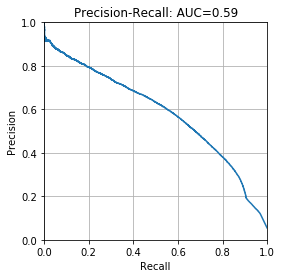

In [4]:
# Experiment
featureset = [3,7,11,12,15,17]
num_files = 2700
threshold = 0.5
train_set_proportion = .8
test_set_proportion = 1 - train_set_proportion
filters = [[11,'>',1000]]
centiles = [0,25,50,75,100]
size = 40
step = 30
reusefeatures = True
savefeatures = False
reuseclassifier = True
saveclassifier = False
saveresults = True

# Split up image files into training and test sets
imgfilenames = glob.glob(IMAGE_DIR + '*.jpg')

baseimgfilenames = [os.path.basename(imgfilenames[i]) 
                    for i in range(num_files)]                            

train, test = train_test_split(np.arange(num_files),
                               train_size=train_set_proportion,
                               test_size=test_set_proportion,
                               random_state=1)  

trainfiles = [baseimgfilenames[i] for i in train]
testfiles = [baseimgfilenames[i] for i in test]  

print 'Extracting features from training images...'
Xtrain = getfeatures(trainfiles, size, step,
                    attributes=featureset,
                    filters=filters,
                    centiles=centiles,
                    loadfromfile=reusefeatures, 
                    savetofile=savefeatures,
                    filename='Xtrain.npy') 

ytrain = getlabels(trainfiles, size, step,
                  loadfromfile=reusefeatures,
                  savetofile=savefeatures,
                  filename='ytrain.npy')     
                            
print 'Extracting features from testing images...'
Xtest = getfeatures(testfiles, size, step,
                    attributes=featureset,
                    filters=filters,
                    centiles=centiles,
                    loadfromfile=reusefeatures, 
                    savetofile=savefeatures,
                    filename='Xtest.npy') 

ytest = getlabels(testfiles, size, step,
                  loadfromfile=reusefeatures,
                  savetofile=savefeatures,
                  filename='ytest.npy')   

# Classification - Extremely Randomized Trees classifier
if reuseclassifier:
    classifier = pickle.load(open(FEATURES_DIR + 'classifier.pkl', 'rb')) 

else:
    print 'Training...'
    classifier = ensemble.ExtraTreesClassifier(n_estimators=250, max_depth=5, n_jobs=-1)
    classifier.fit(Xtrain,ytrain)

if saveclassifier:
    pickle.dump(classifier, open(FEATURES_DIR + 'classifier.pkl', 'wb'))


# Plot bounding boxes around parasites annotated on testing images
predictions = classifier.predict_proba(Xtest)[:,1]
#for i, img_name in enumerate(testfiles):
#    img = (cv2.imread("data/images/{}".format(img_name)))
#    output = displayframe(img=img, predictions=predictions[i*850:(i+1)*850], labels=ytest[i*850:(i+1)*850], threshold=threshold, size=size, step=step)
#    cv2.imwrite(img_name, output)

    
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(ytest, predictions)
    
area = auc(recall, precision)
print("Area under precision-recall curve: %0.2f" % area)
    
fig = plt.figure()
fig.set_size_inches(4,4)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AUC=%0.2f' % area)
plt.savefig("precision_recall.pdf")




Extracting features from training images...
Extracting features from testing images...
Training...
Area under precision-recall curve: 0.58


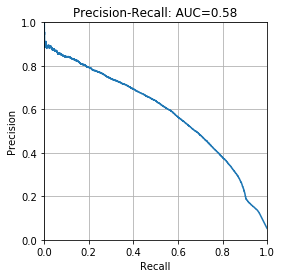

In [4]:
# Experiment
featureset = [3,7,11,12,15,17]
num_files = 2700
threshold = 0.5
train_set_proportion = .8
test_set_proportion = 1 - train_set_proportion
filters = [[11,'>',1000]]
centiles = [0,25,50,75,100]
size = 40
step = 30
reusefeatures = True
savefeatures = False
reuseclassifier = False
saveclassifier = True
saveresults = True

# Split up image files into training and test sets
imgfilenames = glob.glob(IMAGE_DIR + '*.jpg')

baseimgfilenames = [os.path.basename(imgfilenames[i]) 
                    for i in range(num_files)]                            

train, test = train_test_split(np.arange(num_files),
                               train_size=train_set_proportion,
                               test_size=test_set_proportion,
                               random_state=1)  

trainfiles = [baseimgfilenames[i] for i in train]
testfiles = [baseimgfilenames[i] for i in test]  

print 'Extracting features from training images...'
Xtrain = getfeatures(trainfiles, size, step,
                    attributes=featureset,
                    filters=filters,
                    centiles=centiles,
                    loadfromfile=reusefeatures, 
                    savetofile=savefeatures,
                    filename='Xtrain.npy') 

ytrain = getlabels(trainfiles, size, step,
                  loadfromfile=reusefeatures,
                  savetofile=savefeatures,
                  filename='ytrain.npy')     
                            
print 'Extracting features from testing images...'
Xtest = getfeatures(testfiles, size, step,
                    attributes=featureset,
                    filters=filters,
                    centiles=centiles,
                    loadfromfile=reusefeatures, 
                    savetofile=savefeatures,
                    filename='Xtest.npy') 

ytest = getlabels(testfiles, size, step,
                  loadfromfile=reusefeatures,
                  savetofile=savefeatures,
                  filename='ytest.npy')   

# Classification - Extremely Randomized Trees classifier
if reuseclassifier:
    classifier = pickle.load(open(FEATURES_DIR + 'classifier_500.pkl', 'rb')) 

else:
    print 'Training...'
    classifier = ensemble.ExtraTreesClassifier(n_estimators=500, max_depth=5, n_jobs=-1)
    classifier.fit(Xtrain,ytrain)

if saveclassifier:
    pickle.dump(classifier, open(FEATURES_DIR + 'classifier_500.pkl', 'wb'))


# Plot bounding boxes around parasites annotated on testing images
#predictions = classifier.predict_proba(Xtest)[:,1]
#for i, img_name in enumerate(testfiles):
#    img = (cv2.imread("data/images/{}".format(img_name)))
#    output = displayframe(img=img, predictions=predictions[i*850:(i+1)*850], labels=ytest[i*850:(i+1)*850], threshold=threshold, size=size, step=step)
#    cv2.imwrite(img_name, output)

    
# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(ytest, predictions)
    
area = auc(recall, precision)
print("Area under precision-recall curve: %0.2f" % area)
    
fig = plt.figure()
fig.set_size_inches(4,4)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AUC=%0.2f' % area)
plt.savefig("precision_recall.pdf")




/afs/inf.ed.ac.uk/user/s14/s1459898/miniconda3/envs/malaria/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


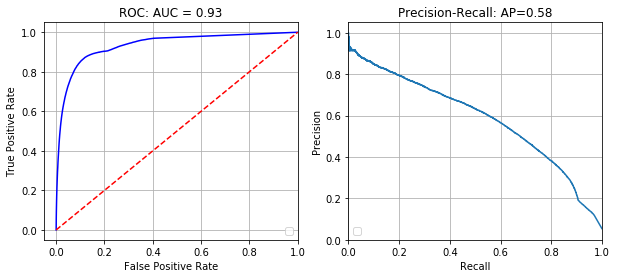

In [5]:
from sklearn import metrics

false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(ytest, predictions)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

precision, recall, thresholds = metrics.precision_recall_curve(ytest, predictions)
average_precision = metrics.average_precision_score(ytest, predictions)

plt.subplot(1, 2,1)
plt.title('ROC: AUC = %0.2f'% roc_auc)
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid('True')

plt.subplot(1, 2,2)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall: AP={0:0.2f}'.format(average_precision))
plt.grid('True')
plt.legend(loc="lower left")

plt.gcf().set_size_inches(10,4)

plt.savefig("precision_recall + ROC.pdf", bbox_inches='tight')

# Plot patches by classification score

In [9]:
thresholds = [.6, .3, 0]
ncols = 8
nrows = len(thresholds)
for row in range(nrows):
    thresh = thresholds[row]
    idx = np.where(np.logical_and(predictions>thresh, predictions<(thresh+.1)))[0]
    idx = np.random.permutation(idx)
    npatchesperimage = len(ytest)/len(testfiles)
    offset = 0
    for i in range(ncols):
        found = False
   ss     while not found:
            imageidx = idx[i+offset]/npatchesperimage
            patchidx = idx[i+offset] % npatchesperimage
            if patchidx<300:
                found = True
            else:
                offset += 1
        sss
        fname = IMAGE_DIR + testfiles[imageidx]
        img = cv2.imread(fname)
        height, width, channels = img.shape
        patchcount = 0
        finished = False
        x = sstep
        y = step
        while y<height and not finished:
            x = step;
            while (x<width) and not finished:
                if patchcount==patchidx:
                    left = x - size/2
                    right = x + size/2
                    top = y - size/2
                    bottom = y + size/2 
                    patch = img[top:bottom, left:right, :]
                    finished = True
                patchcount += 1
                x+=step
            y += step
        
     s   plt.subplot(nrows, ncols, row*ncols + i)
        plt.imshow(patch)
       s plt.xticks([])
        plt.yticks([])
        if i==1:
            ylabel('%.1f-%.1f' % (thresh, thresh+.1))
    

plt.savefig('output-patches-by-threshold.pdf', bbox_inches='tight')
s

IndexError: index 0 is out of bounds for axis 0 with size 0

In [14]:
np.max(predictions)

0.45682793347768946

# Comparison by plotting on the same graph

In [ ]:
train_X_aug_features = np.load("data/train_X_Aug_features.npy")
test_X_aug_features = np.load("data/test_X_Aug_features.npy")
train_y_aug_features = np.load("data/train_y_augmented.npy")
test_y_aug_features = np.load("data/test_y_augmented.npy")

In [ ]:
# NA augmented
N_train = 100000
clf = neighbors.KNeighborsClassifier(n_neighbors=8, weights='distance')
clf.fit(train_X_aug_features[:N_train,:].reshape((N_train,-1)), train_y_aug_features[:N_train].reshape((N_train,-1)))
y_pred_aug_features = clf.predict_proba(test_X_aug_features[:N_train].reshape((test_X_aug_features[:N_train].shape[0],-1)))[:,1]

false_positive_rate_aug_features, true_positive_rate_aug_features, thresholds_aug_features = metrics.roc_curve(test_y_aug_features[:N_train].reshape((N_train,-1)), y_pred_aug_features)
roc_auc_aug_features = metrics.auc(false_positive_rate_aug_features, true_positive_rate_aug_features)

precision_aug_features, recall_aug_features, thresholds_aug_features = metrics.precision_recall_curve(test_y_aug_features[:N_train].reshape((N_train,-1)), y_pred_aug_features)
average_precision_aug_features = metrics.average_precision_score(test_y_aug_features[:N_train].reshape((N_train,-1)), y_pred_aug_features)


In [ ]:
# augmented
N_train = 100000
clf = neighbors.KNeighborsClassifier(n_neighbors=8, weights='distance')
clf.fit(train_X_features[:N_train,:].reshape((N_train,-1)), train_y_features[:N_train].reshape((N_train,-1)))
y_pred_features= clf.predict_proba(test_X_features[:N_train].reshape((test_X_features[:N_train].shape[0],-1)))[:,1]

false_positive_rate_features, true_positive_rate_features, thresholds_features= metrics.roc_curve(test_y_features[:N_train].reshape((N_train,-1)), y_pred_features)
roc_auc_features = metrics.auc(false_positive_rate_features, true_positive_rate_features)

precision_features, recall_features, thresholds_features = metrics.precision_recall_curve(test_y_gray[:N_train].reshape((N_train,-1)), y_pred_gray)
average_precision_features = metrics.average_precision_score(test_y_features[:N_train].reshape((N_train,-1)), y_pred_features)



In [ ]:
plt.subplot(1, 2,1)
plt.title('ROC')
plt.plot(false_positive_rate_aug_features, true_positive_rate_aug_features, label='Imbalanced data (AUC = {0:0.2f})'.format(roc_auc_aug_features))
plt.plot(false_positive_rate_features, true_positive_rate_features, label='Augmented data (AUC = {0:0.2f})'.format(roc_auc_features))
plt.legend()
plt.plot([0,1],[0,1],'r--')
plt.ylim([-.05, 1.05])
plt.xlim([-.05, 1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid('True')

plt.subplot(1, 2,2)
plt.plot(recall_aug_features, precision_aug_features, label='Imbalanced data (AP={0:0.2f})'.format(average_precision_aug_features))
plt.plot(recall_features, precision_features, label='Augmented data (AP={0:0.2f})'.format(average_precision_features))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend()
plt.grid('True')

plt.gcf().set_size_inches(10,4)

plt.savefig("COMPARISON_knn_feature_augmented", bbox_inches='tight')